In [ ]:
#objective: Find out if a donor will give blood in March 2007
#use classification + RFM model

In [ ]:
#classificaiton

In [1]:
#load libraries
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, recall_score, precision_score, f1_score, confusion_matrix, recall_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [2]:
#load data
df = pd.read_csv('../datasets/transfusion.data.csv', sep=",")

In [3]:
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [4]:
#remove bad data
#check for missing data
nan_rows = df.isnull().T.any().T.sum()
#drop missing data
df = df.dropna()
df.shape

(748, 5)

In [5]:
#perform summary statistics
df.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [6]:
df.columns.tolist()

['Recency (months)',
 'Frequency (times)',
 'Monetary (c.c. blood)',
 'Time (months)',
 'whether he/she donated blood in March 2007']

In [7]:
scaler = preprocessing.MinMaxScaler()
to_scale_df = df[['Recency (months)',
 'Frequency (times)',
 'Monetary (c.c. blood)',
 'Time (months)']]
scaled_df = scaler.fit_transform(to_scale_df)
scaled_df = pd.DataFrame(scaled_df, columns=['Recency (months)',
 'Frequency (times)',
 'Monetary (c.c. blood)',
 'Time (months)'])
scaled_df.reset_index(drop=True, inplace=True)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [8]:
df['whether he/she donated blood in March 2007'].reset_index(drop=True, inplace=True)

In [9]:
#combine data
df_new = pd.concat([scaled_df,df['whether he/she donated blood in March 2007']], axis=1)
df_new.shape

(748, 5)

In [10]:
#data split
X = df_new.drop('whether he/she donated blood in March 2007', axis=1)
y = df_new[['whether he/she donated blood in March 2007']]
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

KNN: 0.755694 (0.135731)
CART: 0.723550 (0.121565)
SVM: 0.762414 (0.147377)
RF: 0.738288 (0.151883)
SGD: 0.660162 (0.253415)
GB: 0.762396 (0.136728)


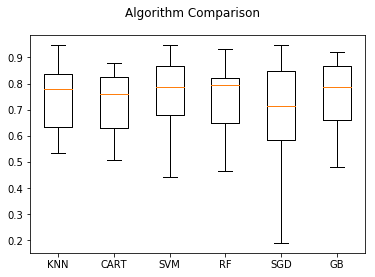

In [11]:
#design model
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
#perform classification
array = df_new.values
X = array[:,0:4]
Y = array[:,4]
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))
models.append(('SGD', SGDClassifier()))
models.append(('GB', GradientBoostingClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [12]:
import warnings
warnings.simplefilter(action='ignore')
from sklearn.metrics import accuracy_score

model = GradientBoostingClassifier()
model.fit(X_train, y_train)

y_predict = model.predict(X_test)
accuracy_score(y_test, y_predict)

0.7813765182186235

In [13]:
#perform confusion matrix
pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=["0", "1"],
    index=["0", "1"]
)

,0,1
0,173,11
1,43,20


In [ ]:
#RFM